In [1]:
import util as u
import numpy as np
import os
import copy

In [2]:
# pkl_folder="pkl"
fig_folder="figure"
iphone_folder="iphone"
samsung_folder="samsung"
iphone_par=u.load_item("iphone_par.pkl")
samsung_par=u.load_item("samsung_par.pkl")

In [3]:
samsung_par

{'h_par': {'min': 142.2, 'max': 166.9},
 'w_par': {'min': 69.1, 'max': 77.1},
 'rl_par': {'min': 6.52, 'max': 8.31},
 'rm_par': {'min': 6.52, 'max': 8.03},
 'm_ushift_par': {'min': 0, 'max': 1.76},
 'm_lshift_par': {'min': 0, 'max': 2.44},
 'rs_par': {'min': 4.89, 'max': 6.97},
 'sux_par': {'min': -0.37, 'max': 1.33},
 'suh_par': {'min': -0.76, 'max': 0.86},
 'slh_par': {'min': 0.41, 'max': 1.97},
 'camera_r_h_par': {'min': 7.82, 'max': 8.01},
 'camera2r_par': {'min': 7.79, 'max': 9.96},
 'camera_d_par': {'min': 7.29, 'max': 11.03},
 'camera_r1_par': {'min': 2.47, 'max': 2.49},
 'camera_r2_par': {'min': 1.59, 'max': 1.63},
 'ring_par': {'min': 2.36, 'max': 2.65},
 'camera_m_h_par': {'min': 5.23, 'max': 5.37},
 'camera_m_r_par': {'min': 1.81, 'max': 1.98},
 'trap_u_par': {'min': 12.45, 'max': 13.56},
 'trap_l_par': {'min': 8.51, 'max': 10.5},
 'trap_h_ratio_par': {'min': 0.1, 'max': 1},
 'vol_l_par': {'min': 19.25, 'max': 20.04},
 'vol_h_par': {'min': 28.76, 'max': 41.8},
 'bixby_l_par'

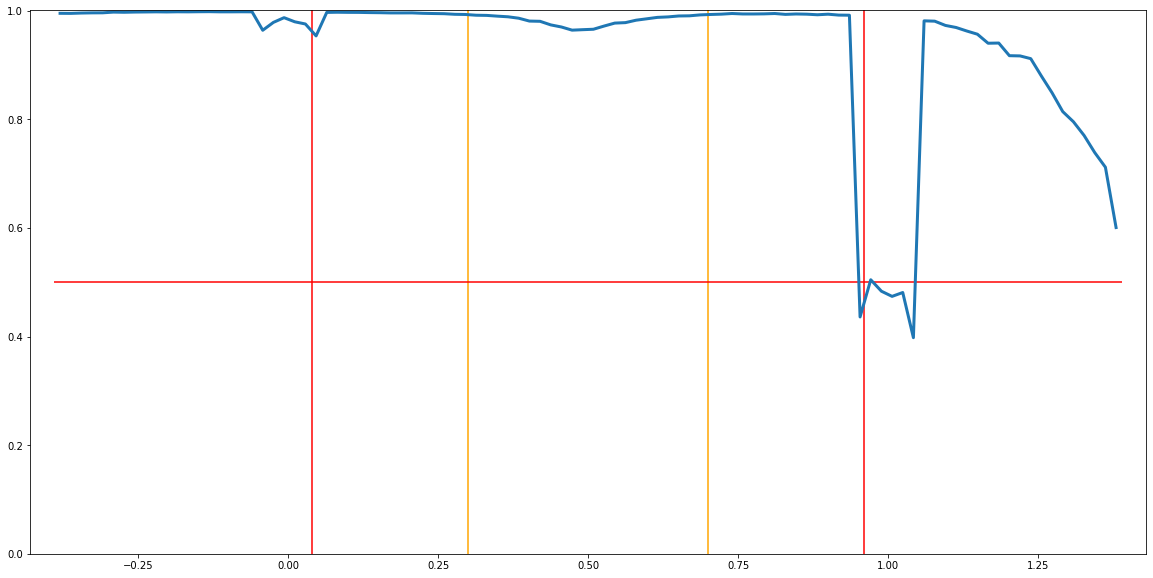

In [6]:
import matplotlib.pyplot as plt
extra_folder="extrapolation"
iphone_folder=extra_folder+"/iphone"
u.initialize([iphone_folder])

iphone_ref=u.iphone_interpolation\
(0.5,notch_random=0, lens_random=np.array([[[0,0,0,1]]]))
iphone_ref["notch_random"][0][0]=1
iphone_ref["vshift"][0][0]=4.5
iphone_ref["scr2pl"][0][0]=1.2
iphone_ref["fillet"][0][0]=5
iphone_ref["lens1"][0][0]=1.5
# iphone_ref["mute"][0][0]=1e-9
# iphone_ref["notch_w"][0][0]=1e-9
# iphone_ref["notch_r1"][0][0]=1e-9
iphone_ref["notch_r2"][0][0]=1

iphone_observe=copy.deepcopy(iphone_ref)
data_size=(1,100)
target="lens1p"
low, up = -0.38, 1.38
target_array=np.linspace(low, up, data_size[1])

for i in iphone_observe:
    if i=="lens_random":
        iphone_observe[i]=np.ones((data_size[0],data_size[1],4))*\
        np.array([0,0,0,1])
    elif iphone_ref[i][0][0]==None:
        iphone_observe[i]=np.zeros(data_size)
    elif i==target:
        iphone_observe[i]=\
        np.expand_dims(target_array,0)
    else:
        iphone_observe[i]=np.ones(data_size)*iphone_ref[i][0][0]
        
u.create_iphone_dataset(iphone_observe, iphone_folder,\
                      draw_nodes=0, stroke_aug=0, stripe=0)


iphone_path=u.get_filelist(dir,iphone_folder)

#exclude the generated other curves
exclude_group=[ x for x in iphone_path if "group" not in x ]
exclude=[ x for x in exclude_group if "curve" not in x ]
exclude_sorted=u.sort_list(exclude)

pred_rec=[]
# model_path="rec_sage_ns2.pt"
model_path="phonesage_naug_norm.pt"
for pic_path in exclude_sorted:
#     print(pic_path)
    iphone_acc, iphone_pred=u.test1svg(model_path, pic_path, brand="iphone", resample=1,\
                prediction=1, ablation=iphone_folder+"/"+model_path,\
                                      mode="norm", temp_seed=0)
#     iphone_folder+"/"+model_path
#     print(pic_path, iphone_pred)
    pred_rec.append(iphone_pred[0][0])

left_bound, right_bound=0.04, 0.96
plt.figure(figsize=(20,10))
plt.vlines(left_bound, -0.01,1.01,color="red")
plt.vlines(right_bound, -0.01,1.01,color="red")
plt.vlines(0.3, -0.01,1.01,color="orange")
plt.vlines(0.7, -0.01,1.01,color="orange")
plt.hlines(0.5, low-0.01, up+0.01,color="red")
plt.axis((low-0.05,up+0.05,0,1.001))
plt.plot(target_array, pred_rec, linewidth=3)

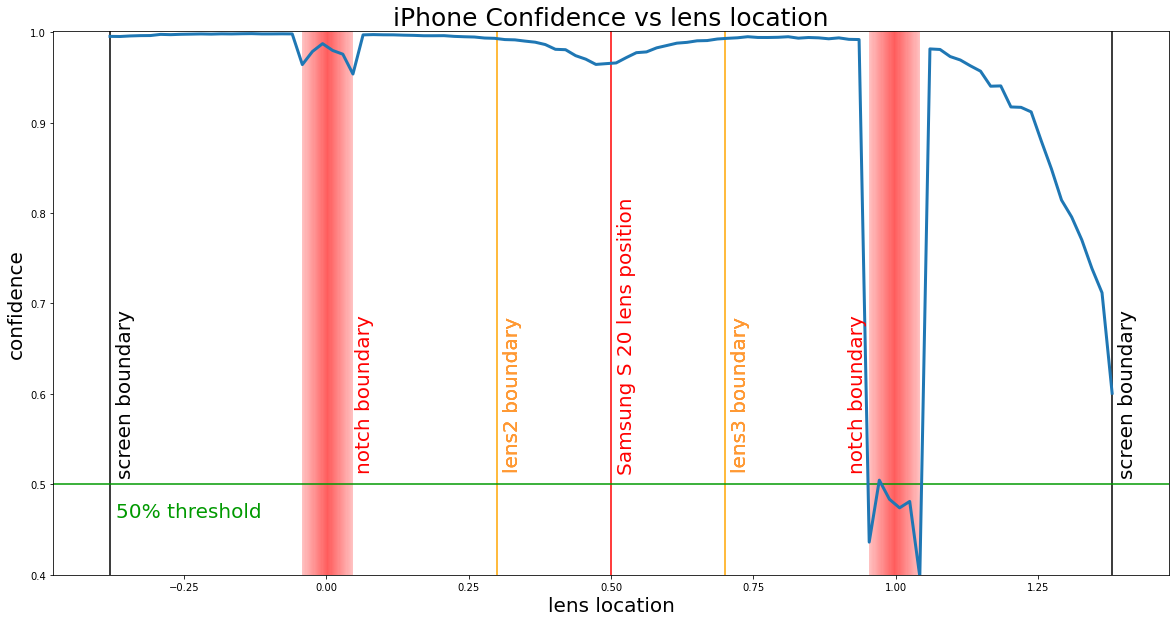

In [7]:
extra_folder="lens1p"
title="iPhone Confidence vs lens location"
plt.figure(figsize=(20,10))

plt_lrange=-0.38
plt_rrange=1.38

# plt.vlines(left_bound, -0.01,1.01,color="red")
# plt.vlines(right_bound, -0.01,1.01,color="red")
plt.text(left_bound+0.01, 0.6, 'notch boundary', ha='left',\
         rotation=90, va='center', fontsize=20, color=[1,0,0])
u.plot_rainbow(target_array[19], target_array[24], interval=2e-3, color=[1,0.2,0.2])
plt.text(right_bound-0.01, 0.6, 'notch boundary', ha='right',\
         rotation=90, va='center', fontsize=20, color=[1,0,0])

u.plot_rainbow(target_array[75], target_array[80], interval=2e-3, color=[1,0.2,0.2])

plt.vlines(0.3, -0.01,1.01,color="orange")
plt.vlines(0.7, -0.01,1.01,color="orange")

plt.text(0.31, 0.6, 'lens2 boundary', ha='left',\
         rotation=90, va='center', fontsize=20, color=[1,0.6,0.2])
plt.text(0.71, 0.6, 'lens3 boundary', ha='left',\
         rotation=90, va='center', fontsize=20, color=[1,0.6,0.2])

plt.vlines(plt_lrange, -0.01,1.01,color="black")
plt.vlines(plt_rrange, -0.01,1.01,color="black")

plt.text(plt_lrange+0.01, 0.6, 'screen boundary', ha='left',\
         rotation=90, va='center', fontsize=20, color=[0,0,0])
plt.text(plt_rrange+0.01, 0.6, 'screen boundary', ha='left',\
         rotation=90, va='center', fontsize=20, color=[0,0,0])

plt.text(0.31, 0.6, 'lens2 boundary', ha='left',\
         rotation=90, va='center', fontsize=20, color=[1,0.6,0.2])
plt.text(0.71, 0.6, 'lens3 boundary', ha='left',\
         rotation=90, va='center', fontsize=20, color=[1,0.6,0.2])

plt.text(0.31, 0.6, 'lens2 boundary', ha='left',\
         rotation=90, va='center', fontsize=20, color=[1,0.6,0.2])
plt.text(0.71, 0.6, 'lens3 boundary', ha='left',\
         rotation=90, va='center', fontsize=20, color=[1,0.6,0.2])

plt.vlines(0.5, -0.01,1.01,color=[1,0,0])
plt.text(0.51, 0.665, 'Samsung S 20 lens position', ha='left',\
         rotation=90, va='center', fontsize=20, color=[1,0,0])

plt.hlines(0.5, low-0.1, up+0.1,color=[0,0.6,0])
plt.text(low+0.01, 0.47, '50% threshold', ha='left',\
         va='center', fontsize=20, color=[0,0.6,0])


plt.axis((low-0.1,up+0.1,0.4,1.001))
plt.title(title, fontsize=25)
plt.xlabel("lens location", fontsize=20)
plt.ylabel("confidence", fontsize=20)

# x=list(target_array[:19])+list(target_array[25:75])+list(target_array[81:])
# y=list(pred_rec[:19])+list(pred_rec[25:75])+list(pred_rec[81:])
# plt.plot(x, y, linewidth=3)
plt.plot(target_array, pred_rec, linewidth=3)
plt.savefig("%s.jpg"\
            %(title))

u.dump_item(target_array,"x.pkl")
u.dump_item(pred_rec,"y.pkl")

In [57]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
def plot_rainbow(xmin, xmax, ymin=0, ymax=1.02, interval=0.1, alpha_start=0.8, alpha_end=0.3, color=[0,0.4,0.4]):
    mid=0.5*(xmax+xmin)
    span=xmax-xmin
    wing=span/2
    box_num=int(wing/interval)
    alpha=alpha_start
    alpha_interval=(alpha_start-alpha_end)/box_num
    plt.gca().add_patch(Rectangle((mid-interval/2,ymin),interval, ymax,
                    edgecolor='black',
                    facecolor=color,
                    lw=0.0,
                    alpha=alpha))
    
    for i in range(box_num):
        alpha-=alpha_interval
    #     print(alpha)
        x_start=mid-interval/2-(i+1)*interval
        plt.gca().add_patch(Rectangle((x_start,ymin),interval,ymax,
                            edgecolor='black',
                            facecolor=color,
                            lw=0.0,
                            alpha=alpha))

        x_start=mid-interval/2+(i+1)*interval
        plt.gca().add_patch(Rectangle((x_start,ymin),interval,ymax,
                            edgecolor='black',
                            facecolor=color,
                            lw=0.0,
                            alpha=alpha))